### __TITANIC SURVIVAL PREDICTION__


**Problem Statement:**
Develop a predictive model using the Titanic dataset to determine the likelihood of a passenger surviving the sinking of the Titanic. Utilizing information such as age, gender, ticket class, fare, and cabin, the model aims to accurately classify passengers into survived or not survived categories. This project serves as a fundamental exercise in data analysis and predictive modeling, offering insights into the factors influencing survival rates aboard the Titanic.

**Goal:** The goal is to create a predictive model using the Titanic dataset to accurately determine whether a passenger survived or not based on various attributes.

#### __1.1 Analytical Questions__

#### __1.2 Hypothesis__

**Null hypothesis:**

**Alternative hypothesis:**

**Dataset Columns**


**Survived:** Whether survived or not.

**Pclass:** Passenger class. 1 is first class, 2 second class, 3 third class. 

**Name:** Name of passenger.

**Age:** Age of passenger. 

**SibSp:** Information about passenger's siblings and spouse.  

**Parch:** Information about passenger's parents and children. 

**Ticket:** Ticket number of passengers. 

**Fare:** Fare paid by passengers.  

**Cabin:** Cabin number of the passengers. 

**Embarked:** Information about port of embarkation. C is Cherbourg, Q is Queenstown, S is Southampton. 


**Null hypothesis:** Age did not affect the survival rate in the Titanic.

**Alternative hypothesis:** Age did affect the survival rate in the Titanic.

__1.3 Analytical Questions__

1. What is survival rate for men and women?

2. Did passengers in first class had higher survival rate than those in second and third class?

3. Did age affect survival rate?

4. What was passengers' age distribution in the Titanic?

5. Did location of passengers' cabin affect survival rate?

#### __2. Data Understanding__

__1.3 Importation of Libraries__

In [101]:
# For Data Manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
#For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
import joblib

# For Filter Warnings
import warnings
warnings.filterwarnings("ignore")

__2.1 Data Loading__

In [102]:
# Loading of dataset
titanic_df = pd.read_csv(r'C:\Users\USER\Documents\Azubi Africa Class\CodSoft Internship\CODESOFT\Data TITANIC\Titanic-Dataset.csv')

__2.2 Exploratory Data Analysis (EDA)__

In [103]:
# Dataset Overview
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [104]:
# Number of columns and rows in sales_df
print (titanic_df.shape)
print(f"There are {titanic_df.shape[0]} rows, and {titanic_df.shape[1]} columns")

(891, 12)
There are 891 rows, and 12 columns


In [105]:
# checking info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
# Describing the data
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- The the youngest person the Titanic was about 5 months while the oldest person had 80 years. 


In [107]:
# checking for duplicates
print("There are ",titanic_df.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [58]:
# Checking for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### __2.2.1 Handling Missing Values__ 

__Missing Values in Embarked__

In [59]:
# Fill missing values in embarked by mode
mode_embarked = titanic_df['Embarked'].mode()[0]

# Fill missing values with the mode
titanic_df['Embarked'].fillna(mode_embarked, inplace=True)

__Missing Values in Age__

In [60]:
# Fill missing values in age using random numbers based on mean and age
mean_age = titanic_df["Age"].mean()
std_age = titanic_df["Age"].std()
is_null = titanic_df["Age"].isnull().sum()

# Generate random ages within the range of mean_age ± std_age for missing values
rand_age = np.random.randint(mean_age - std_age, mean_age + std_age, size=is_null)

# Fill NaN values in the "Age" column with randomly generated ages
age_slice = titanic_df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic_df["Age"] = age_slice.astype(int)

# Check if there are any remaining missing values in the "Age" column of the titanic_df DataFrame
print(titanic_df["Age"].isnull().sum())

0


__Missing Values in Cabin__

In [61]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Fill missing values in the "Cabin" column with "U0"
titanic_df['Cabin'] = titanic_df['Cabin'].fillna("U0")

# Extract the deck information from the "Cabin" column
titanic_df['Deck'] = titanic_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

# Map the deck values to numerical values using the deck dictionary
titanic_df['Deck'] = titanic_df['Deck'].map(deck)

# Fill missing values in the "Deck" column with 0
titanic_df['Deck'] = titanic_df['Deck'].fillna(0)

# Convert the "Deck" column to integers
titanic_df['Deck'] = titanic_df['Deck'].astype(int)

# Drop the "Cabin" column
titanic_df.drop(['Cabin'], axis=1, inplace=True)

In [62]:
# Confirm no missing values
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [63]:
# Number of unique values
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             71
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
Deck             9
dtype: int64

- Columns with missing values are Age, Cabin and Embarked. 

In [64]:
# Extract titles from the "Name" column
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: re.search(r'(\w+)\.', name).group(1))

# Display unique values in the "Title" column
unique_titles = titanic_df['Title'].unique()
print("Unique Titles:", unique_titles)

Unique Titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


- The passengers onboard had different status as shown by the titles. 

In [65]:
# Create the "Family" feature by combining "SibSp" and "Parch"
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Display the updated DataFrame with the "Family" feature
print(titanic_df[['SibSp', 'Parch', 'Family']].head())

   SibSp  Parch  Family
0      1      0       2
1      1      0       2
2      0      0       1
3      1      0       2
4      0      0       1


- SibSP and Parch are combined into a more general column family.

#### __2.3 Univariate Analysis__

In [66]:
# Calculate the number of survivors
num_survivors = titanic_df['Survived'].sum()

# Calculate the number of non-survivors
num_non_survivors = titanic_df['Survived'].count() - num_survivors

# Calculate the total number of passengers
total_passengers = titanic_df['Survived'].count()

# Calculate the percentage of survivors
survival_percentage = (num_survivors / total_passengers) * 100

# Calculate the percentage of non-survivors
non_survival_percentage = (num_non_survivors / total_passengers) * 100

# Print the results
print("Number of Survivors:", num_survivors)
print("Number of Non-Survivors:", num_non_survivors)
print("Survival Percentage: {:.2f}%".format(survival_percentage))
print("Non-Survival Percentage: {:.2f}%".format(non_survival_percentage))

Number of Survivors: 342
Number of Non-Survivors: 549
Survival Percentage: 38.38%
Non-Survival Percentage: 61.62%


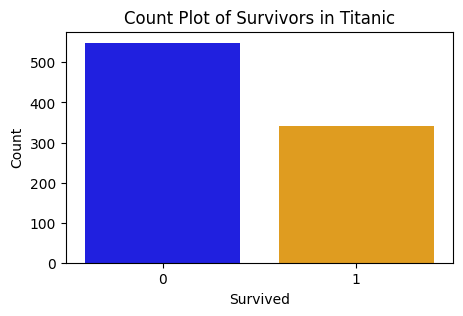

In [67]:
# Create a count plot for survivors
plt.figure(figsize=(5, 3))
# Create a count plot for survivors with blue and yellow bars
sns.countplot(x='Survived', data=titanic_df, palette=['blue', 'orange'])
# Set the labels for the plot
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count Plot of Survivors in Titanic')

# Display the plot
plt.show()

In [68]:
# Calculate the number of survivors and non-survivors in each Pclass
survivors_by_pclass = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

# Print the results
print("Number of Survivors and Non-survivors in each Pclass:")
print(survivors_by_pclass)

Number of Survivors and Non-survivors in each Pclass:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


#### __2.4 Bivariate Analysis__

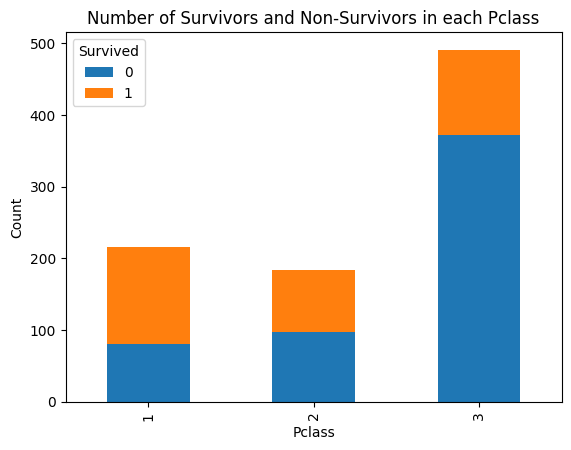

In [69]:
# Calculate the number of survivors and non-survivors in each Pclass
survivors_by_pclass = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

# Plot the bar chart
survivors_by_pclass.plot(kind='bar', stacked=True)

# Set the labels and title for the plot
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Number of Survivors and Non-Survivors in each Pclass')

# Display the plot
plt.show()

In [70]:
# Calculate the number of males and females who survived and did not survive in each Pclass
count_by_pclass_sex_survived = titanic_df.groupby(['Pclass', 'Sex', 'Survived']).size()

# Print the results
print("Number of Males and Females who Survived and Did Not Survive in each Pclass:")
print(count_by_pclass_sex_survived)

Number of Males and Females who Survived and Did Not Survive in each Pclass:
Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64


In [71]:
# Calculate the survival rate for males and females in each Pclass
survival_rate_by_pclass_sex = titanic_df.groupby(['Pclass', 'Sex'])['Survived'].mean()*100

# Print the results
print("Survival Rate for Males and Females in each Pclass:")
print(survival_rate_by_pclass_sex)

Survival Rate for Males and Females in each Pclass:
Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64


- Survival rate of female passengers in the Titanic was higher in all the three passenger classes. This means gender influenced survival rate in the Titanic. 

In [72]:
# Embarkment at Cherbourg (C), Queenstown(Q) and Southampton (S) ports

count_by_embarked = titanic_df['Embarked'].value_counts()

# Print the results
print("Number of Passengers who Embarked from each Port:")
print(count_by_embarked)

Number of Passengers who Embarked from each Port:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


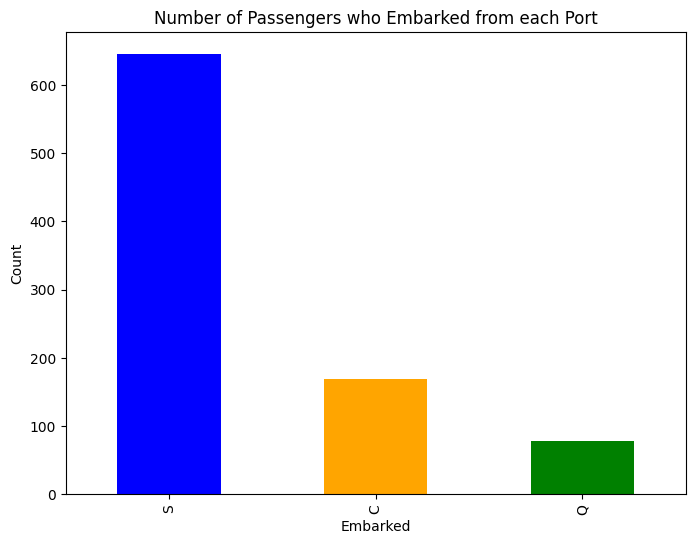

In [73]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Define the colors
colors = ['blue', 'orange', 'green']

# Plot the bar chart with specific colors
count_by_embarked.plot(kind='bar', color=colors)

# Set the labels and title for the plot
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Number of Passengers who Embarked from each Port')

# Display the plot
plt.show()

In [74]:
# Calculate the number of passengers who survived and did not survive based on embarkation port
count_by_embarked_survived = titanic_df.groupby(['Embarked', 'Survived']).size()

# Print the results
print("Number of Passengers who Survived and Did Not Survive based on Embarkation Port:")
print(count_by_embarked_survived)

Number of Passengers who Survived and Did Not Survive based on Embarkation Port:
Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64


<Figure size 800x600 with 0 Axes>

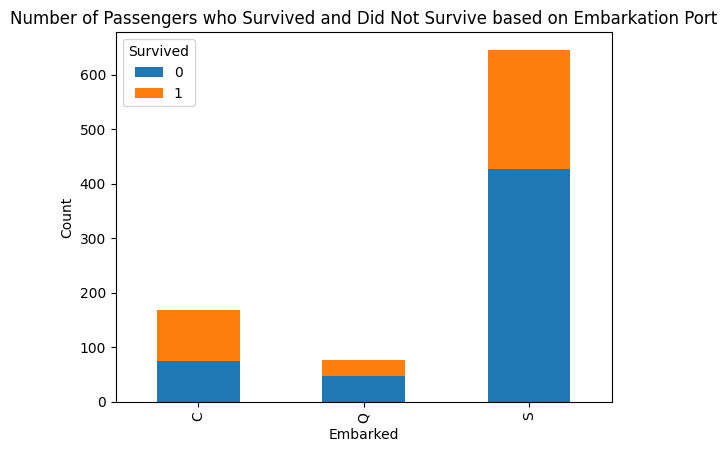

In [75]:
# Reshape the data for plotting
count_by_embarked_survived = count_by_embarked_survived.unstack()

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the bar chart
count_by_embarked_survived.plot(kind='bar', stacked=True)

# Set the labels and title for the plot
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Number of Passengers who Survived and Did Not Survive based on Embarkation Port')

# Display the plot
plt.show()

In [76]:


# Calculate the survival rate based on embarkation port
survival_rate_by_embarked = titanic_df.groupby('Embarked')['Survived'].mean() * 100

# Display the survival rate as percentages
print("Survival Rate based on Embarkation Port:")
print(survival_rate_by_embarked)

Survival Rate based on Embarkation Port:
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


- Survival rate was highest for passengers who embarked at Cherbourg (C) despite a large of passengers embarking at Southampton.  


#### __2.5 Multivariate Analysis__

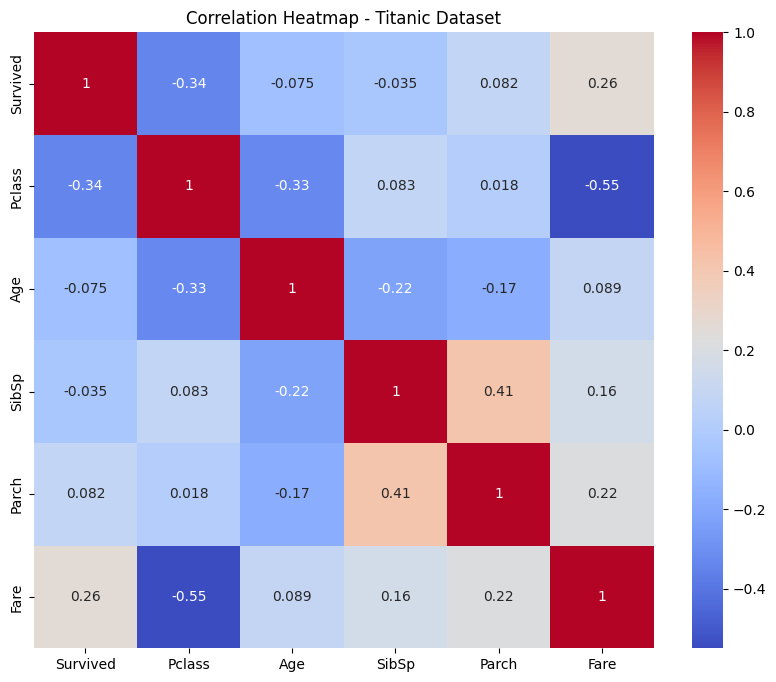

In [77]:
# Select columns for the heatmap
columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create a correlation matrix
correlation_matrix = titanic_df[columns].corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title for the plot
plt.title('Correlation Heatmap - Titanic Dataset')

# Display the plot
plt.show()

- The heatmap shows corelation of the target variable (survived) and the rest of the features. 

#### __2.6 Hypothesis Testing__

In [78]:
# Create age categories
titanic_df['AgeCategory'] = pd.cut(titanic_df['Age'], bins=[0, 17, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Create a contingency table of age category and survival
contingency_table = pd.crosstab(titanic_df['AgeCategory'], titanic_df['Survived'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-square test results:")
print("Chi-square value:", chi2)
print("p-value:", p_value)

# Determine whether to reject or fail to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: Age affected the survival rate.")
else:
    print("Fail to reject the null hypothesis: Age did not affect the survival rate.")

Chi-square test results:
Chi-square value: 5.658395566191973
p-value: 0.05906021377221318
Fail to reject the null hypothesis: Age did not affect the survival rate.


#### __3. Data Preparation__ 

In [79]:
# Check the data types of each column in titanic_df
data_types = titanic_df.dtypes
print(data_types)

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
Deck              int32
Title            object
Family            int64
AgeCategory    category
dtype: object


In [80]:
# Convert fare column to integer
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

In [81]:
# Map 'female' to 1 and 'male' to 0 in the "Sex" column
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 1, 'male': 0})

In [82]:
# Drop some columns that might not be important in determining survival rate.
titanic_df.drop(['Ticket'], axis=1, inplace=True)

In [83]:
# Show available columns
print(titanic_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Deck', 'Title', 'Family', 'AgeCategory'],
      dtype='object')


In [84]:
# Display unique values in the "AgeCategory" column
age_categories = titanic_df["AgeCategory"].unique()
print("Age Categories:", age_categories)

Age Categories: ['Adult', 'Child', 'Elderly', NaN]
Categories (3, object): ['Child' < 'Adult' < 'Elderly']


In [85]:
# Drop columns that are not associated with survival.
columns_to_drop = ['PassengerId', 'Parch', 'SibSp']
titanic_df = titanic_df.drop(columns=columns_to_drop)

# Show updated columns
print(titanic_df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck',
       'Title', 'Family', 'AgeCategory'],
      dtype='object')


In [86]:
titanic_df.reset_index(drop=True, inplace=True)

In [87]:
# Check the data types of columns
column_data_types = titanic_df.dtypes
column_data_types

Survived          int64
Pclass            int64
Name             object
Sex               int64
Age               int32
Fare              int32
Embarked         object
Deck              int32
Title            object
Family            int64
AgeCategory    category
dtype: object

In [88]:
class_distr= titanic_df['Survived'].value_counts().rename('Total').reset_index()
class_distr

,Survived,Total
0,0,549
1,1,342


#### __3.1 Split Dataset into Training and Evaluation__

- X = input_data
- y = label

In [89]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [90]:
X.head ()

,Pclass,Name,Sex,Age,Fare,Embarked,Deck,Title,Family,AgeCategory
0,3,"Braund, Mr. Owen Harris",0,22,7,S,8,Mr,2,Adult
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,71,C,3,Mrs,2,Adult
2,3,"Heikkinen, Miss. Laina",1,26,7,S,8,Miss,1,Adult
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,53,S,3,Mrs,2,Adult
4,3,"Allen, Mr. William Henry",0,35,8,S,8,Mr,1,Adult


In [91]:
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [92]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [93]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

In [94]:
# check X_train and X_test dimension
print('X_train dimension:',X_train.shape)
print('X_test dimension:',X_test.shape)

X_train dimension: (623, 10)
X_test dimension: (268, 10)


In [95]:
# Check y_tain and y_test dimension
print('y_train dimension:',y_train.shape)
print('y_test dimension:',y_test.shape)

y_train dimension: (623,)
y_test dimension: (268,)


#### __3.2 Prepare Pipelines__

In [96]:
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns
categorical_columns


Index(['Name', 'Embarked', 'Title', 'AgeCategory'], dtype='object')

In [97]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Pclass', 'Sex', 'Family'], dtype='object')

In [98]:
## Numeric Pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),  # impute numerical columns with mean
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # impute with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor (ColumnTransformer)
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numeric_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])


#### __3.3 Modelling__ 

In [99]:
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random_Forest', RandomForestClassifier(random_state=42))
]

all_pipelines = {}
all_metrics = {}

metric_table = pd.DataFrame(columns=['model_name', 'accuracy','precision', 'recall','f1_score'])

for model_name, classifier in models:
    # create final pipeline with preprocessor and classifier
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded) 
    
    #Add all pipeline into the all_pipeline dictionary
    
    all_pipelines[model_name] = final_pipeline
    
    y_pred = final_pipeline.predict(X_test)
    
    # Generate classification report for each pipeline or model
    metrics = classification_report(y_test_encoded, y_pred, output_dict= True)
    all_metrics[model_name] = metrics

     # Grab all important metrics 
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    metric_table.loc[len(metric_table)]= [model_name, accuracy, precision, recall, f1]

print (metric_table)

            model_name  accuracy  precision    recall  f1_score
0        Decision_Tree  0.820896   0.820471  0.820896  0.817495
1  Logistic_Regression  0.824627   0.823243  0.824627  0.822949
2                  KNN  0.817164   0.815703  0.817164  0.815847
3        Random_Forest  0.817164   0.815911  0.817164  0.814471


- The best performing model to predict survival in the titanic dataset is Random_Forest because of its highest f1 score. 

#### __3.4 Parsing the Best Model__

In [100]:



# Select the best model based on F1-score
best_model = metric_table.loc[metric_table['f1_score'].idxmax(), 'model_name']

# Save the best model using joblib
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']